Most EDA are done in Excel, thus the limited content in this notebook

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import LabelEncoder

In [93]:
df_train = pd.read_csv('labelled_training_data.csv')
df_valid = pd.read_csv('labelled_validation_data.csv')
df_test = pd.read_csv('labelled_testing_data.csv')

In [75]:
df_train['stackAddresses'] = df_train['stackAddresses'].apply(lambda x: len(ast.literal_eval(x)) if x else 0)

In [79]:
df_train_sel = df_train.drop(columns = ['stackAddresses', 'processId', 'eventId', 'args', 'sus', 'evil'])
df_train_cat = df_train_sel.drop(columns = ['argsNum'])

#df_train_cat_encoded = pd.get_dummies(df_train_cat, drop_first=True)

In [81]:
df_train_sel

,timestamp,threadId,parentProcessId,userId,mountNamespace,processName,hostName,eventName,argsNum,returnValue
0,1809.495787,7337,1,100,4026532231,close,ip-10-100-1-120,prctl,5,0
1,1809.495832,7337,1,100,4026532231,close,ip-10-100-1-120,close,1,0
2,1809.495921,7337,1,100,4026532231,close,ip-10-100-1-120,sched_process_exit,0,0
3,1894.139651,7347,7341,0,4026531840,sh,ip-10-100-1-120,access,2,-2
4,1894.142127,7347,7341,0,4026531840,sh,ip-10-100-1-120,security_file_open,4,0
...,...,...,...,...,...,...,...,...,...,...
763139,324.542553,7274,7108,0,4026531840,sshd,ip-10-100-1-79,cap_capable,1,0
763140,324.542579,7274,7108,0,4026531840,sshd,ip-10-100-1-79,kill,2,0
763141,324.543178,7274,7108,0,4026531840,sshd,ip-10-100-1-79,sched_process_exit,0,0
763142,324.543695,7275,1,109,4026531840,sshd,ip-10-100-1-79,sched_process_exit,0,0


In [83]:
df_train_cat_encoded

,timestamp,threadId,parentProcessId,userId,mountNamespace,returnValue,processName_(sd-sync),processName_(time-dir),processName_(tmpfiles),processName_amazon-ssm-agen,...,eventName_security_file_open,eventName_security_inode_unlink,eventName_setgid,eventName_setuid,eventName_socket,eventName_stat,eventName_symlink,eventName_umount,eventName_unlink,eventName_unlinkat
0,1809.495787,7337,1,100,4026532231,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1809.495832,7337,1,100,4026532231,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1809.495921,7337,1,100,4026532231,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1894.139651,7347,7341,0,4026531840,-2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1894.142127,7347,7341,0,4026531840,0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763139,324.542553,7274,7108,0,4026531840,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
763140,324.542579,7274,7108,0,4026531840,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
763141,324.543178,7274,7108,0,4026531840,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
763142,324.543695,7275,1,109,4026531840,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
df = pd.concat([df_train_cat_encoded, df_train['stackAddresses'], df_train['argsNum'] ])

In [87]:
corr_matrix = df.corr()

In [89]:
print(corr_matrix)

                    timestamp  threadId  parentProcessId    userId  \
timestamp            1.000000  0.009125         0.299987 -0.043992   
threadId             0.009125  1.000000         0.264324 -0.173622   
parentProcessId      0.299987  0.264324         1.000000 -0.032717   
userId              -0.043992 -0.173622        -0.032717  1.000000   
mountNamespace      -0.270486  0.018492        -0.452629  0.012523   
...                       ...       ...              ...       ...   
eventName_umount    -0.003441  0.000527        -0.001944 -0.000139   
eventName_unlink    -0.027211 -0.000995        -0.037630  0.000776   
eventName_unlinkat  -0.022406  0.006004        -0.019972 -0.001433   
stackAddresses            NaN       NaN              NaN       NaN   
argsNum                   NaN       NaN              NaN       NaN   

                    mountNamespace  returnValue  processName_(sd-sync)  \
timestamp                -0.270486    -0.001652               0.036267   
threadId   

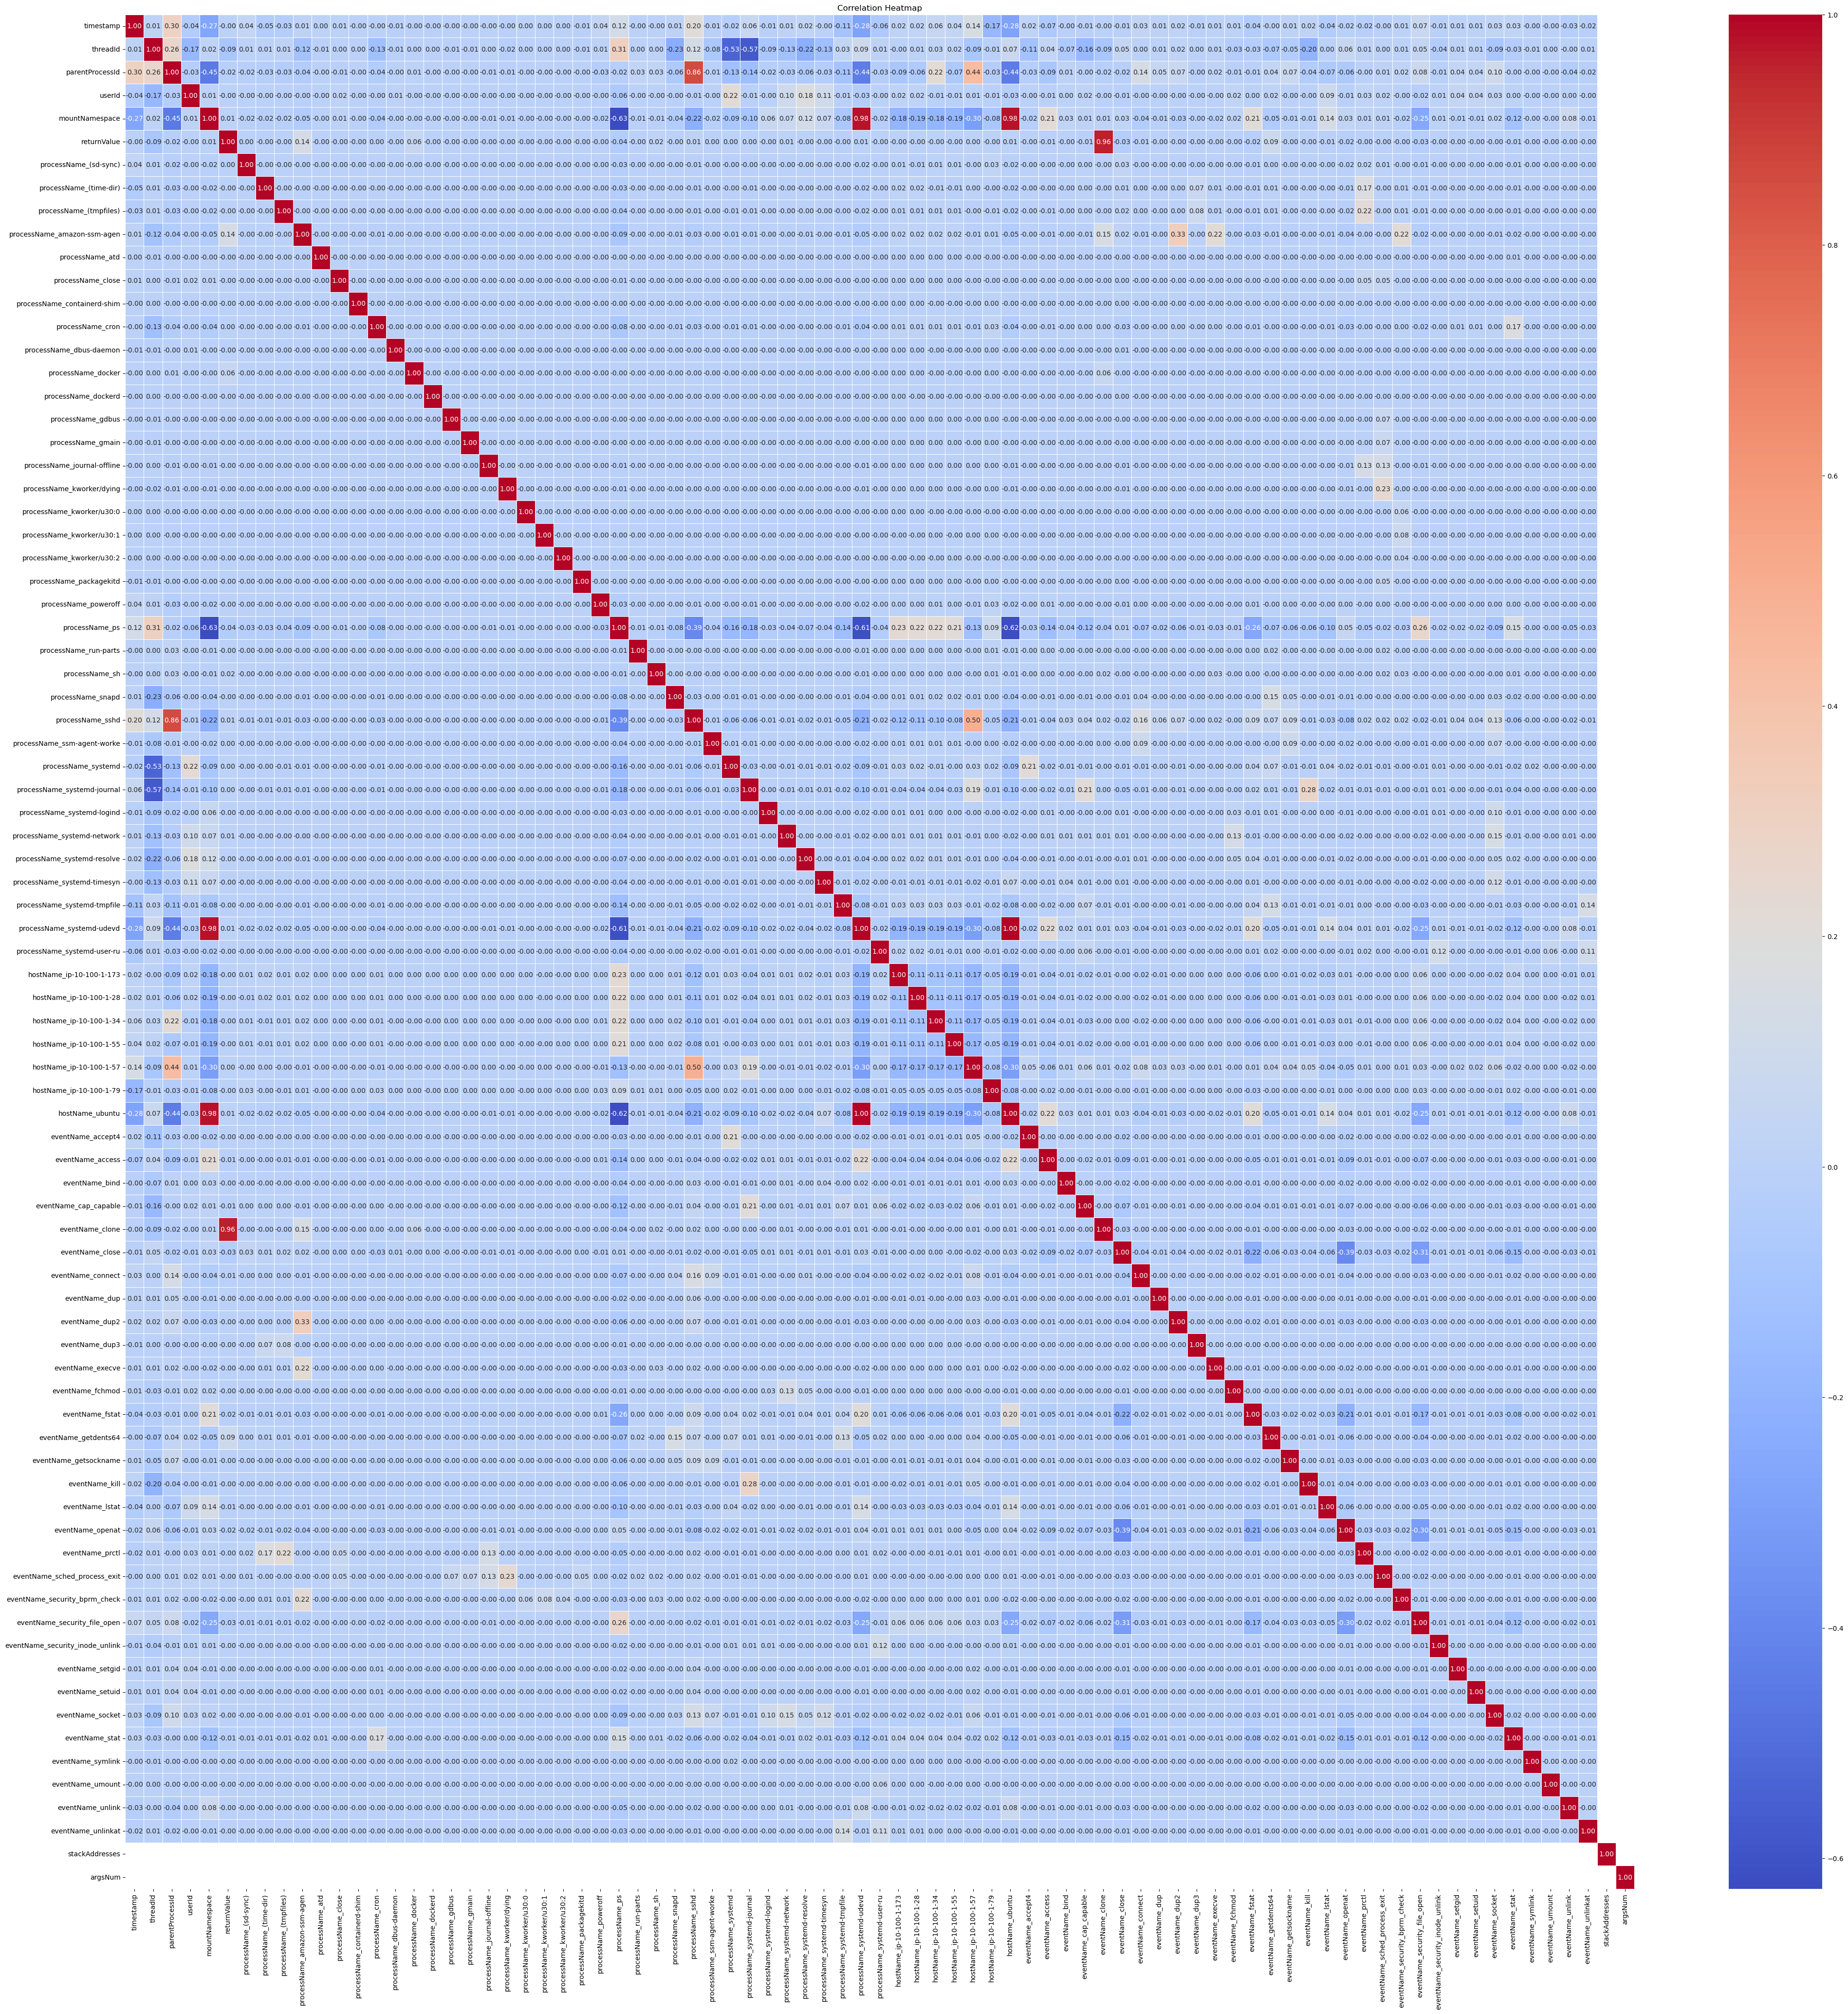

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()